I used [load_digits](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) dataset from sklearn. Applied the following dimensionality reduction techniques on the dataset. 


1.   PCA
2.   SVD
3. LLE
4. Isomap
5. UMAP
6. T-SNE


## **PCA**

PCA - unsupervised machine learning algorithm that transforms a set of correlated variables into a smaller number of correlated variables

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [ ]:
df = load_digits()
df.data.shape

(1797, 64)

In [ ]:
X, y = load_digits(return_X_y=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
X_Stand = scaler.transform(X)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_Stand)

In [ ]:
explained_variance = pca.explained_variance_ratio_
explained_variance


array([0.12033916, 0.09561054])

In [ ]:
X_pca.shape


(1797, 2)

In [ ]:
df.data.shape

(1797, 64)

In [ ]:
explained_variance = pca.explained_variance_ratio_
explained_variance


array([0.12033916, 0.09561054])

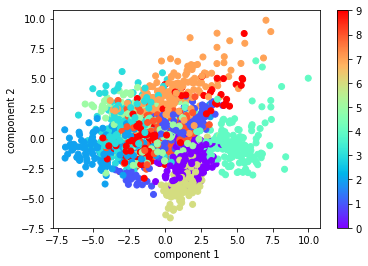

In [ ]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='rainbow')
plt.xlabel(('component 1'))
plt.ylabel(('component 2'))
plt.colorbar()

Text(0, 0.5, 'cumulative explained variance')

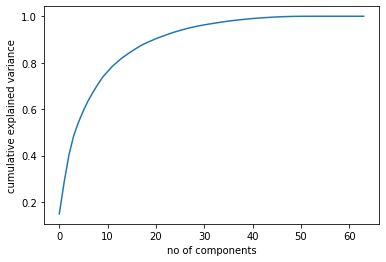

In [ ]:
pca = PCA().fit(df.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('no of components')
plt.ylabel('cumulative explained variance')

## **SVD**

The Singular-Value Decomposition(SVD) is a matrix decomposition method for reducing a matrix to its constituent parts in order to make certain subsequent matrix calculations simpler.


A = U . Sigma . V^T


In [ ]:
X_d = df.data
y_d = df.target

In [ ]:
from sklearn.utils.extmath import randomized_svd 
import pandas as pd 

U,Sigma,VT = randomized_svd(X,n_components=15,n_iter=300,random_state=42) 
VT_df = pd.DataFrame(VT) 
 


In [ ]:
print("Original shape", X_d.shape)

Original shape (1797, 64)


In [ ]:
print("Left Singular shape", U.shape)

Left Singular shape (1797, 15)


In [ ]:
print("Singular value",Sigma.shape)

Singular value (15,)


In [ ]:
print("Right Singular shape",VT_df.shape)

Right Singular shape (15, 64)


In [ ]:
from sklearn.decomposition import TruncatedSVD 
n_comps = 15 
svd = TruncatedSVD(n_components=n_comps, n_iter=300, random_state=42) 
reduced_X = svd.fit_transform(X)



print("\nTotal Variance explained for %d singular features are %0.3f"%(n_comps, svd.explained_variance_ratio_.sum()))  



Total Variance explained for 15 singular features are 0.834


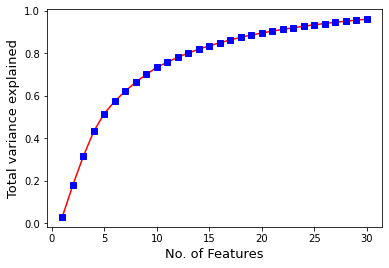

In [ ]:
max_singfeat = 30 
singfeats = [] 
totexp_var = [] 
 
for i in range(max_singfeat): 
     svd = TruncatedSVD(n_components=i+1, n_iter=300, random_state=42) 
     reduced_X = svd.fit_transform(X) 
     tot_var = svd.explained_variance_ratio_.sum() 
     singfeats.append(i+1) 
     totexp_var.append(tot_var) 
 
plt.plot(singfeats,totexp_var,'r') 
plt.plot(singfeats,totexp_var,'bs') 
plt.xlabel('No. of Features',fontsize = 13) 
plt.ylabel('Total variance explained',fontsize = 13) 
plt.show()


## LLE - Locally Linear Embedding

The LLE algorithm is an unsupervised method for dimensionality reduction. It tries to reduce the n-Dimensions while trying to preserve the geometric features of the original non-linear feature structure

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding as LLE # for LLE dimensionality reduction

def run_lle(num_neighbors, dims, mthd, data):
    # Specify LLE parameters
    embed_lle = LLE(n_neighbors=num_neighbors, # default=5, number of neighbors to consider for each point.
                    n_components=dims, # default=2, number of dimensions of the new space 
                    reg=0.001, # default=1e-3, regularization constant, multiplies the trace of the local covariance matrix of the distances.
                    eigen_solver='auto', # {‘auto’, ‘arpack’, ‘dense’}, default=’auto’, auto : algorithm will attempt to choose the best method for input data
                    #tol=1e-06, # default=1e-6, Tolerance for ‘arpack’ method. Not used if eigen_solver==’dense’.
                    #max_iter=100, # default=100, maximum number of iterations for the arpack solver. Not used if eigen_solver==’dense’.
                    method=mthd, # {‘standard’, ‘hessian’, ‘modified’, ‘ltsa’}, default=’standard’
                    #hessian_tol=0.0001, # default=1e-4, Tolerance for Hessian eigenmapping method. Only used if method == 'hessian'
                    modified_tol=1e-12, # default=1e-12, Tolerance for modified LLE method. Only used if method == 'modified'
                    neighbors_algorithm='auto', # {‘auto’, ‘brute’, ‘kd_tree’, ‘ball_tree’}, default=’auto’, algorithm to use for nearest neighbors search, passed to neighbors.NearestNeighbors instance
                    random_state=42, # default=None, Determines the random number generator when eigen_solver == ‘arpack’. Pass an int for reproducible results across multiple function calls.
                    n_jobs=-1 # default=None, The number of parallel jobs to run. -1 means using all processors.
                   )
    # Fit and transofrm the data
    result = embed_lle.fit_transform(data)
    
    # Return results
    return result

In [ ]:
std_lle_res=run_lle(num_neighbors=30, dims=2, mthd='standard', data=X_d)


In [ ]:
import plotly.express as px # for data visualization

# Create a 2D scatter plot
def Plot2D(X, y, plot_name):
    # Create a scatter plot
    fig = px.scatter(None, x=X[:,0], y=X[:,1], 
                     labels={
                         "x": "Dimension 1",
                         "y": "Dimension 2",
                     },
                     opacity=1, color=y)

    # Change chart background color
    fig.update_layout(dict(plot_bgcolor = 'white'))

    # Update axes lines
    fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                     zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                     showline=True, linewidth=1, linecolor='black')

    fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                     zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                     showline=True, linewidth=1, linecolor='black')

    # Set figure title
    fig.update_layout(title_text=plot_name)

    # Update marker size
    fig.update_traces(marker=dict(size=5,
                                 line=dict(color='black', width=0.3)))
    return fig

In [ ]:
Plot2D(std_lle_res, y, 'LLE')


## **Isomap** 

Isomap is an Unsupervised Machine Learning technique, that combines several different algorithms, enabling it to use a non-linear way to reduce dimensions while preserving local structures.

In [ ]:
def run_isomap(num_neighbors, dims, data):
    # Specify Isomap parameters
    embed_isomap = Isomap(n_neighbors=num_neighbors, n_components=dims, n_jobs=-1)
    
    # Fit and transofrm the data
    result = embed_isomap.fit_transform(data)
    
    # Return results
    return result

In [ ]:
from sklearn.manifold import Isomap # for Isomap dimensionality reduction

isomap_res=run_isomap(num_neighbors=30, dims=2, data=X_d)


In [ ]:
Plot2D(isomap_res, y, 'Isomap')


## **UMap**

Uniform Manifold Approximation and Projection is a nonlinear dimensionality reduction method, it is very effective for visualizing clusters or groups of data points and their relative proximities.

In [ ]:
!pip install umap


In [ ]:
!pip install umap-learn

In [ ]:
import umap

In [ ]:
start = time.time()
reducer = umap.UMAP(random_state=42, n_components=3)
embedding = reducer.fit_transform(X_d)
print('Duration: {} seconds'.format(time.time() - start))


/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning:

The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.



Duration: 14.611728429794312 seconds


In [ ]:
def plot_map(component1, component2):
    
    fig = go.Figure(data=go.Scatter(
        x = component1,
        y = component2,
        mode='markers',
        marker=dict(
            size=20,
            color=y, #set color equal to a variable
            colorscale='Rainbow', # one of plotly colorscales
            showscale=True,
            line_width=1
        )
    ))
    fig.update_layout(margin=dict( l=100,r=100,b=100,t=100),width=2000,height=1200)                 
    fig.layout.template = 'plotly_dark'
    
    fig.show()

In [ ]:
import plotly.io as plt_io
import plotly.graph_objects as go
%matplotlib inline

plot_map(reducer.embedding_[:,0],reducer.embedding_[:,1])

## **T-SNE**

T-distributed stochastic neighbour embedding takes a high dimensional data set and reduces it to a low dimensional graph that retains a lot of the original information, by giving each data point a location in a two or three-dimensional map. This technique finds clusters in data thereby making sure that an embedding preserves the meaning in the data

In [ ]:
from sklearn.manifold import TSNE

pca_1 = PCA(n_components=30)
pca_result = pca_1.fit_transform(X_d)

tsne = TSNE(random_state = 42, n_components=3,verbose=0, perplexity=40, n_iter=400).fit_transform(X_d)
print('Duration: {} seconds'.format(time.time() - start))

Duration: 746.3744707107544 seconds


In [ ]:
plot_map(tsne[:, 0],tsne[:, 1])


Observations

1.   Of all Umap perfomrmed well in creating mini clusters that are well seperated.
2.   T-sne did a good job, in which similar labels are grouped together
3. Also PCA results are influenced with outliers in the dataset



References:

1.   
https://towardsdatascience.com/11-dimensionality-reduction-techniques-you-should-know-in-2021-dcb9500d388b
2.   
https://machinelearningmastery.com/singular-value-decomposition-for-machine-learning/
3. https://medium.com/analytics-vidhya/locally-linear-embedding-lle-data-mining-b956616d24e9
4. https://towardsdatascience.com/dimensionality-reduction-for-data-visualization-pca-vs-tsne-vs-umap-be4aa7b1cb29
5. https://towardsdatascience.com/isomap-embedding-an-awesome-approach-to-non-linear-dimensionality-reduction-fc7efbca47a0
